## Visualizing waves  

In [2]:
# First load the libs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

# a and load interactive widgets
import ipywidgets as widgets
from IPython.display import display

### Standing and traveling waves in 1D

We beging by plotting a simple periodic function using numpy (np) and matplotlib.pyplot (plt) 
$$y = \sin(kx)=\sin\left(\frac{2\pi}{\lambda} x\right)$$

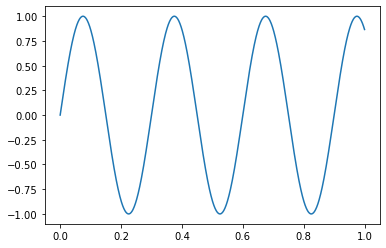

In [3]:
L=0.3            # Try different wavelengths

x = np.linspace(0.0, 1.0, 1000)

y = np.sin(2 * np.pi * x/L)

plt.plot(x, y)

**By putting above example inside a python function will make wavelength exploration much easier.**

In [4]:
def wave(L):
    
    x = np.linspace(0.0, 1.0, 1000)

    y = np.sin(2*np.pi * x/L)

    plt.plot(x, y)

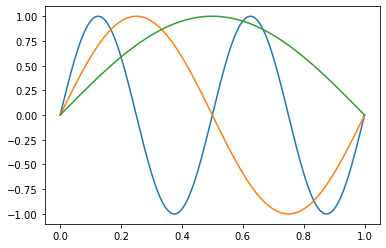

In [37]:
# Now try comparing three different wavelengths
wave(0.5)
wave(1.0)
wave(2.0)

### How to add an interactive widget to the plots

By adding **@widgets.interact(parameters=(init,final))** to our functions we can interactively vary various parameters of the function using dash knobs. Below we illustrate this on the example of our newly created function **wavef(L)** where we vary the length of guitra string L as a parameter between values of 0.1 and 2. Try changing these numbers

In [12]:
@widgets.interact(L=(0.1,1))

def wavef(L):        # By writing wavef(L=0.1) inside function you can specify initial value 
    
    x = np.linspace(0, +1., 1000)
    
    y = np.sin(np.pi * x/L)
    
    plt.plot(x, y)

interactive(children=(FloatSlider(value=0.55, description='L', max=1.0, min=0.1), Output()), _dom_classes=('wi…

## Traveling waves and wave interference 

In [23]:
@widgets.interact(k=(2,20),t=(0,50.0,0.1))

def wavef2(k=10,t=0):

    v=1         #velocity of waves

    phi = 0.5   # vary initial phase between -2*np.pi and 2*np.pi
    
    x = np.linspace(0, 1., 1000)
    
    wave1 = np.sin(k*(x-v*t)) 
    
    wave2= np.sin(k*(x-v*t)+phi)    #try flipping the direction ofvelocity to get standing wave
    
    plt.plot(x, wave1,'--', color='blue')
    plt.plot(x,wave2,'--',  color='green')
    plt.plot(x, wave1+wave2,color='red')
    
    plt.ylim([-2.5,2.5])
    plt.legend(['Wave1','Wave2','Wave1+Wave2'])
    plt.grid('on')

interactive(children=(IntSlider(value=10, description='k', max=20, min=2), FloatSlider(value=0.0, description=…

## Normal modes of 1D guitar string

In [24]:
@widgets.interact(n=(1,10))

def wavef(n=1):
    
    L=1
    
    x = np.linspace(0, +1., 1000)
    
    y = np.sin(n*np.pi * x/L)
    
    plt.plot(x, y, lw=3, color='red')
    
    plt.grid('on')

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

## 1D guitar vibrations as linear combination of normal modes

For simplicity we will combine two modes with two different mode numbers and shifted with resepct to each ophter by a phase $\phi$.  

$$Mode_1 = cos(\omega t) \cdot sin(n_1\pi  \cdot \frac{x}{L})$$

$$Mode_2 = cos(\omega t+\phi) \cdot sin(n_2\pi  \cdot \frac{x}{L})$$

In [25]:
@widgets.interact(n1=(1,5),n2=(1,5),phi=(0,2*np.pi),t=(0,20,0.2))

def wavef(n1=1,n2=1,phi=0,t=0):
    
    L=1
    omega=1
    
    
    x = np.linspace(0, +1., 50)
    
    mode1 = np.cos(omega*t) * np.sin(n1*np.pi * x/L)
    
    mode2 = np.cos(omega*t + phi) * np.sin(n2*np.pi * x/L)
    
    plt.plot(x, mode1+mode2, lw=5, color='orange')
    
    plt.ylim([-2.5,2.5])
    plt.grid('on')

interactive(children=(IntSlider(value=1, description='n1', max=5, min=1), IntSlider(value=1, description='n2',…

## Normal modes of 2d membrane

In [26]:
@widgets.interact(n1=(1,10),m1=(1,10))

def membrane(n1=1, m1=1): 
    
    t=0
    omega=1
    
    Lx,Ly = 1,1                       # size of membrane
    N=40                              # number of grid points along X and Y
    
    xs = np.linspace(0,Lx,N)
    ys = np.linspace(0,Ly,N)
    X,Y = np.meshgrid(xs,ys)          # create 2D mesh of points along X and Y
     

    mode1 = np.sin(n1*np.pi*X/Lx)*np.sin(m1*np.pi*Y/Ly) 

   
    fig, ax =plt.subplots()
    
    ax.contourf(X,Y,mode1,40,cmap='RdBu')

interactive(children=(IntSlider(value=1, description='n1', max=10, min=1), IntSlider(value=1, description='m1'…

## Vibrations of square 2D membrane as a linear combination of normal modes

In [39]:
@widgets.interact(n1=(1,10),m1=(1,10),n2=(1,10),m2=(1,10),phi=(0,2*np.pi),t=(0,100))

def membrane(n1=1, m1=1, n2=1, m2=1, phi=0, t=0): 
    
    omega=1
    
    L=1                       # size of membrane
    N=40                      # number of grid points along X and Y
    
    x = np.linspace(0,L,N)
    y = np.linspace(0,L,N)
    X,Y = np.meshgrid(x,y)   # create 2D mesh of points along X and Y
     

    mode1 = np.cos(omega*t) * np.sin(n1*np.pi*X/L) * np.sin(m1*np.pi*Y/L) 
     
    mode2 = np.cos(omega*t+phi) * np.sin(n2*np.pi*X/L) * np.sin(m2*np.pi*Y/L) 
   

        
    fig, ax = plt.subplots(figsize=(9,6))            
    ax      = plt.axes(projection='3d')   # Making a 3D plot     
   
    ax.set_zlim([-2.0,2.0])
    ax.plot_surface(X,Y,mode1+mode2,cmap='RdYlBu') #Do the Plot 

interactive(children=(IntSlider(value=1, description='n1', max=10, min=1), IntSlider(value=1, description='m1'…